### 5 replicates of an 8-MOX gas sensor array were exposed to different gas conditions (4 volatiles at 10 concentration levels each).

* Dataset Characteristics: Multivariate, Time-Series, Domain-Theory
* Associated Tasks: Classification, Regression
* Missing Value: No

### Dataset Information: 
This dataset includes the recordings of five replicates of an 8-sensor array. Each unit holds 8 MOX sensors and integrates custom-designed electronics for sensor operating temperature control and signal acquisition.

The same experimental protocol was followed to measure the response of the 5 twin units. Each day, a different unit was tested, which included the presentation of 40 different gas conditions, presented in random order. In particular, the unit under test was exposed to 10 concentration levels of Ethanol, Methane, Ethylene, and Carbon Monoxide.
The duration of each experiment was 600 s, and the conductivity of each sensor was acquired at 100Hz.

Channel, sensor type (from Figaro), and mean voltage in the heater are as follows: 
0: TGS2611 5.65 V
1: TGS2612 5.65 V
2: TGS2610 5.65 V
3: TGS2602 5.65 V
4: TGS2611 5.00 V
5: TGS2612 5.00 V
6: TGS2610 5.00 V
7: TGS2602 5.00 V

Presented concentration levels are as follows (in ppm):
Ethylene: 12.5, 25, 37.5, 50.0, 62.5, 75.0, 87.5, 100.0 , 112.5, 125.0
Ethanol: 12.5, 25.0, 37.5, 50.0, 62.5, 75.0, 87.5, 100.0 , 112.5, 125.0
Carbon Monoxide: 25.0, 50.0, 75.0, 100.0 , 125.0 ,150.0, 175.0, 200.0, 225.0 , 250.0
Methane: 25.0, 50.0, 75.0, 100.0 , 125.0 ,150.0, 175.0, 200.0, 225.0 , 250.0
 
Days in which each detection platform was tested.
Unit 1: 4,10,15,21
Unit 2: 1,7,11,16
Unit 3: 2,8,14,17
Unit 4: 3,9
Unit 5: 18,22

More information at:
J. Fonollosa, L. Fernandez, A. Gutierrez-Galvez, R. Huerta, S. Marco. 'Calibration transfer and drift counteraction in chemical sensor arrays using Direct Standardization'. Sensors and Actuators B: Chemical (2016). 
http://dx.doi.org/10.1016/j.snb.2016.05.089


The responses of the sensors are provided in a .txt file for each experiment. File name codes the unit number, gas (Ea: Ethanol, CO: CO, Ey: Ethylene, Me: Methane), concentration (010-100 of the corresponding gas), and repetition. 
For example, B1_GEa_F040_R2.txt indicates B1 (board 1), Ea (Ethanol), 50 ppm, Repetition 2.

Each file includes the elapsed time (in seconds) and the resistance of each sensor (in KOhm). First column is time, and 8 following columns are channels 0-7 as specified before. 

In [43]:
# Import needed libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

In [44]:
#change this with the path to the dataset
dataset_path = "/Users/moji/dataset_repo/twin_gas_sensor" 

# Get the list of files and directories
files_and_dirs = os.listdir(dataset_path)

ds_list = []
# Print each item
for item in files_and_dirs:
    ds_list.append(item)
    # print(item)
print(f'we have {len(ds_list)} items in the dataset folder')

we have 640 items in the dataset folder


In [45]:
new_path = os.path.join(dataset_path,ds_list[100]) #change this to ds_list[1] for the other file
new_path

'/Users/moji/dataset_repo/twin_gas_sensor/B5_GCO_F080_R2.txt'

In [46]:
# Read the rest of the file with space as separator
df = pd.read_csv(new_path, sep='\s+', header=None, index_col=0)

# Format the index to only show the time
df.index = pd.to_datetime(df.index, unit='s')
# df.index = df.index.strftime('%H:%M:%S')
df = df.rename_axis('time (s)')

df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/0s/whfbkk11083fmvg1wl2nrqqm0000gn/T/ipykernel_23616/957927424.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(new_path, sep='\s+', header=None, index_col=0)


,1,2,3,4,5,6,7,8
time (s),,,,,,,,
1970-01-01 00:00:00.000,39.86,24.29,25.99,23.74,108.59,63.40,55.13,47.96
1970-01-01 00:00:00.010,39.78,24.36,25.95,23.78,108.59,63.40,55.13,47.85
1970-01-01 00:00:00.020,39.86,24.36,25.99,23.78,108.59,63.57,55.13,47.96
1970-01-01 00:00:00.030,39.86,24.33,25.99,23.78,108.59,63.40,55.13,47.96
1970-01-01 00:00:00.040,39.86,24.33,25.99,23.74,108.59,63.40,54.99,47.96
...,...,...,...,...,...,...,...,...
1970-01-01 00:09:59.950,40.10,24.48,26.12,24.30,109.04,64.09,55.26,48.39
1970-01-01 00:09:59.960,40.02,24.48,26.12,24.30,109.04,64.09,55.26,48.39
1970-01-01 00:09:59.970,40.02,24.48,26.12,24.30,109.04,63.92,55.40,48.39


In [47]:
# Resample to seconds frequency, taking the max of each bin
df_seconds= df.resample('s').mean()
df_seconds.index = df_seconds.index.strftime('%H:%M:%S')
df_seconds

,1,2,3,4,5,6,7,8
time (s),,,,,,,,
00:00:00,39.8440,24.3479,25.9824,23.7820,108.5450,63.5138,55.1048,47.9665
00:00:01,39.8424,24.3501,25.9836,23.7796,108.5810,63.5223,55.1144,47.9644
00:00:02,39.8464,24.3502,25.9828,23.7788,108.5765,63.5104,55.1128,47.9633
00:00:03,39.8504,24.3467,25.9836,23.7740,108.5675,63.5173,55.1019,47.9611
00:00:04,39.8384,24.3472,25.9792,23.7780,108.5405,63.5343,55.0992,47.9567
...,...,...,...,...,...,...,...,...
00:09:55,40.0616,24.4488,26.1085,24.2968,109.0630,63.9034,55.2672,48.3779
00:09:56,40.0664,24.4412,26.1103,24.2940,109.0401,63.8749,55.2657,48.3702
00:09:57,40.0712,24.4448,26.1130,24.2956,109.0494,63.8946,55.2674,48.3823


In [48]:
df_seconds.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
1,600.0,39.73,0.51,38.39,39.78,39.91,40.01,40.35
2,600.0,24.20,0.38,23.28,24.23,24.36,24.42,24.58
3,600.0,25.35,1.33,22.22,25.83,25.95,26.06,26.29
4,600.0,24.06,0.16,23.77,23.90,24.05,24.22,24.30
5,600.0,107.75,2.27,101.36,108.15,108.62,109.03,109.96
6,600.0,63.09,1.28,59.91,63.23,63.61,63.78,64.35
7,600.0,53.21,3.56,44.72,54.21,55.00,55.16,55.67
8,600.0,47.60,0.75,45.80,47.11,47.96,48.18,48.39


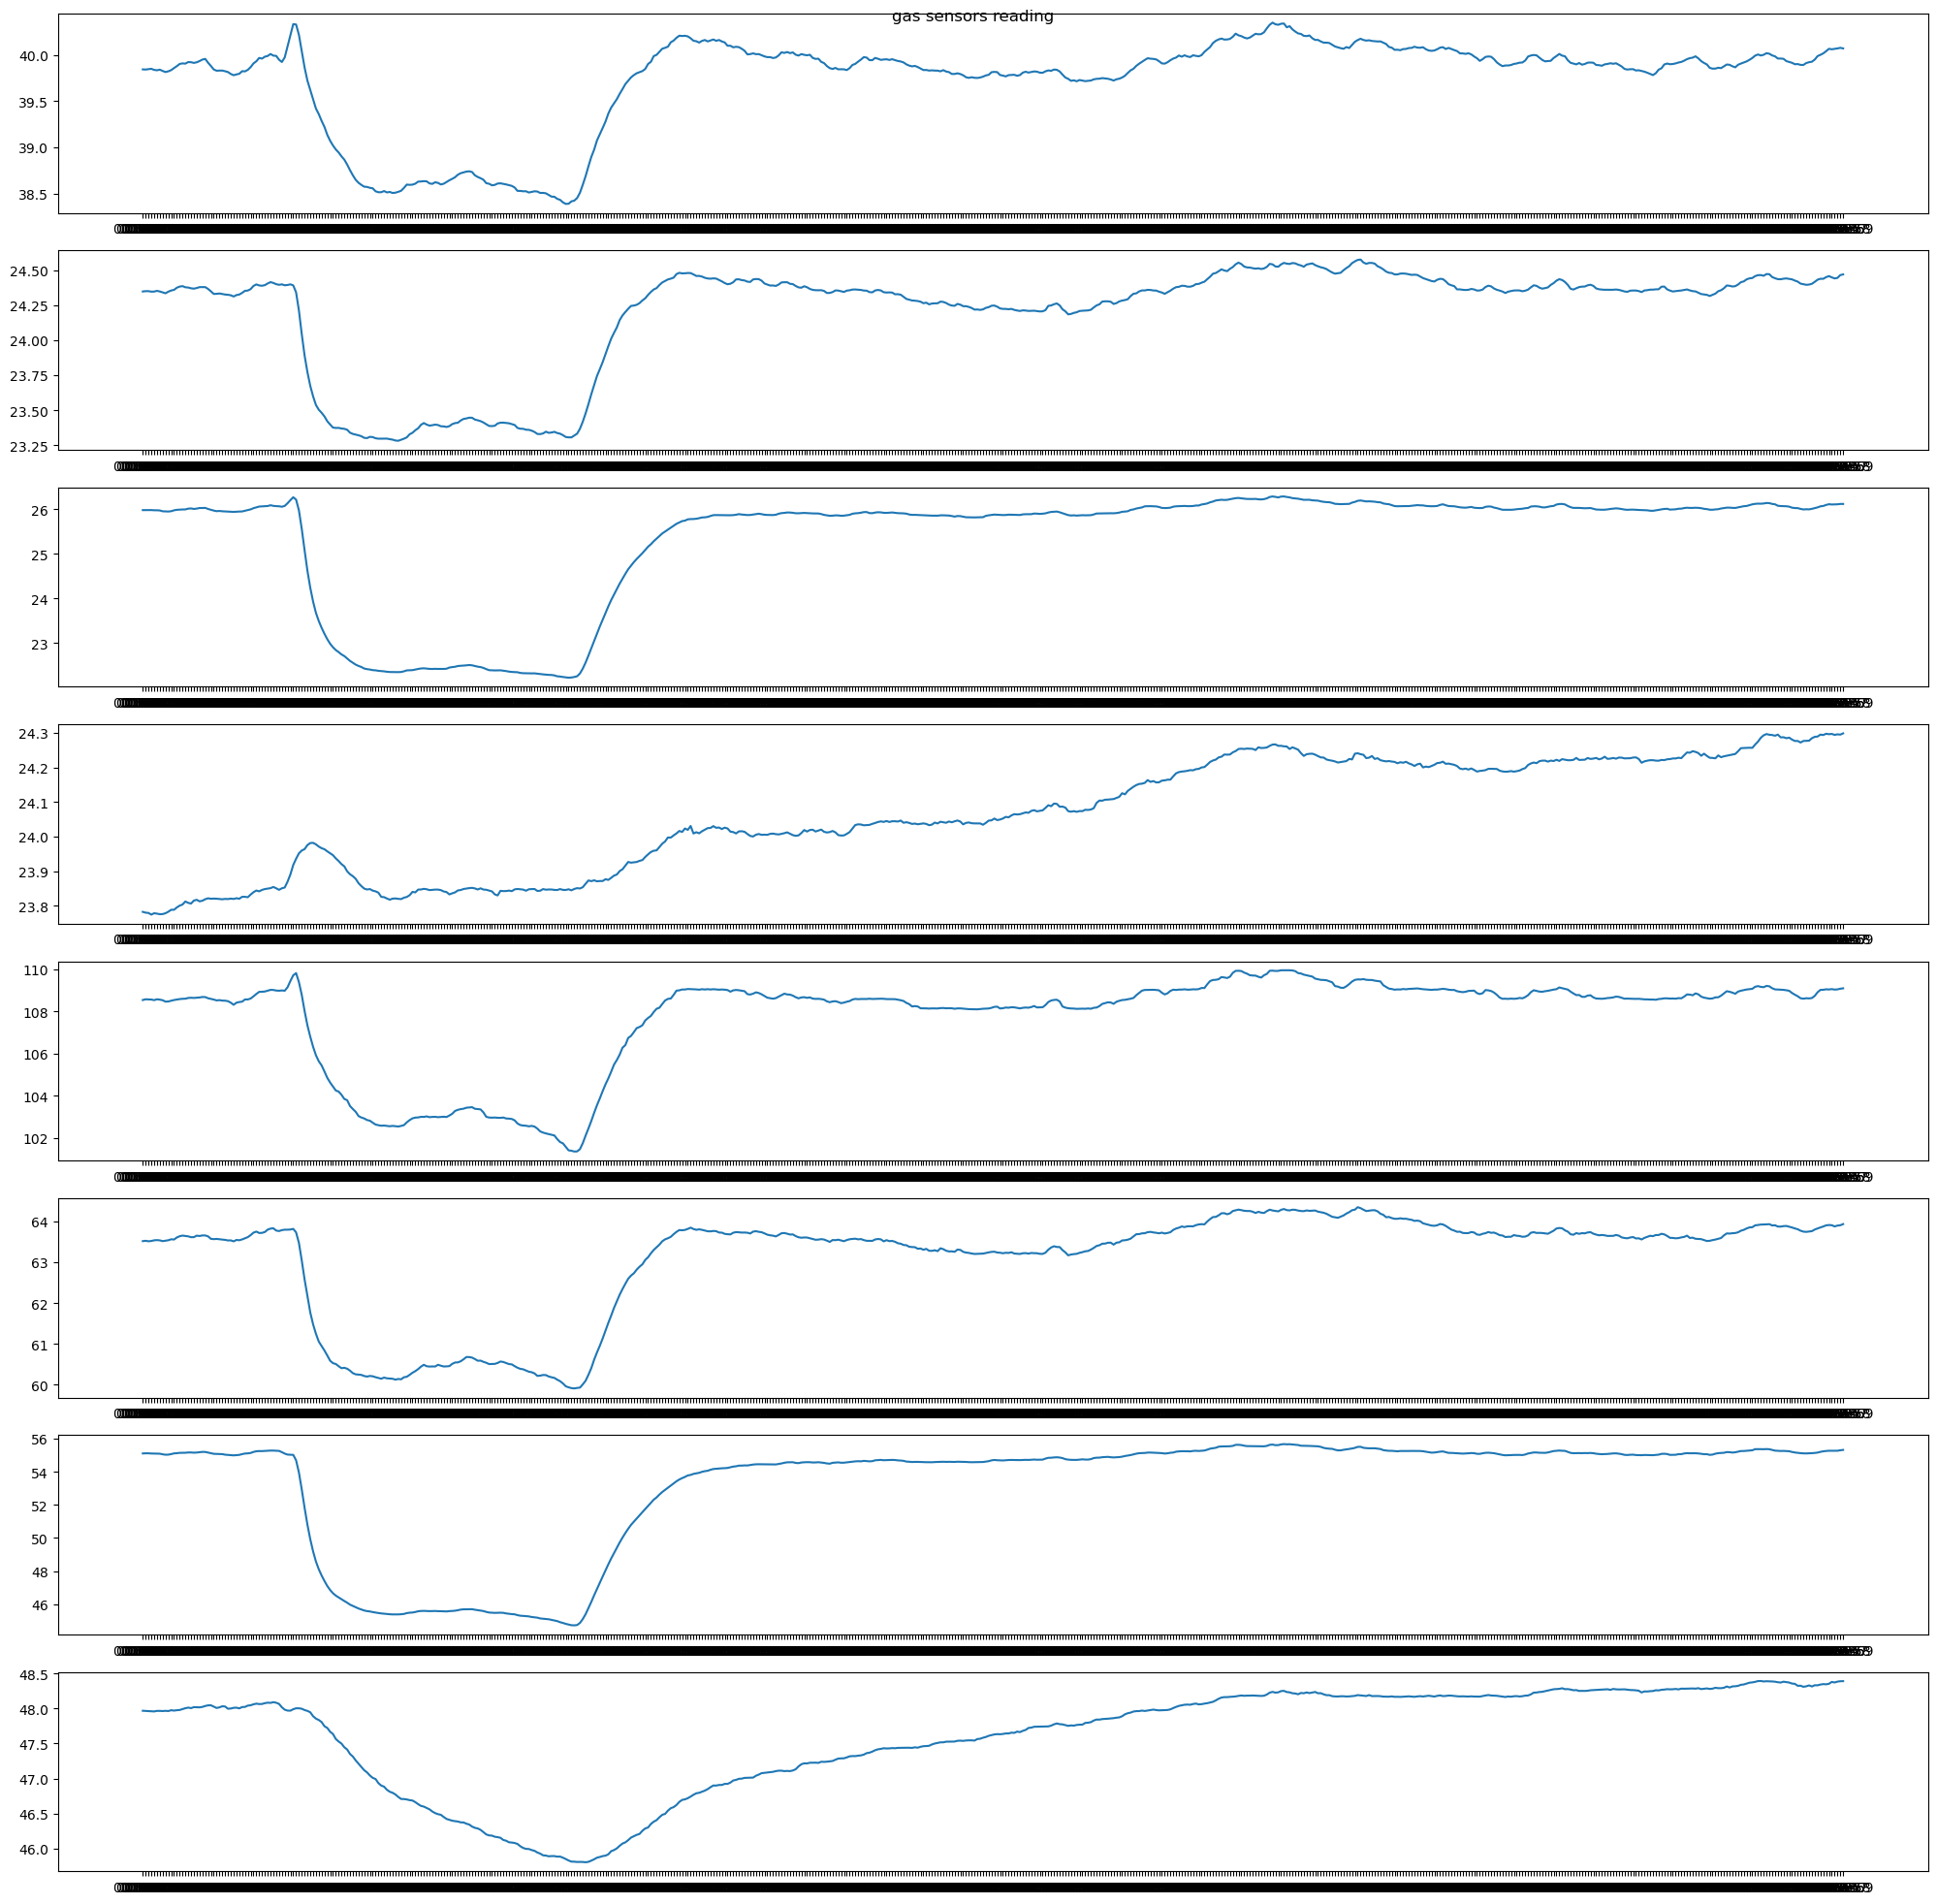

In [49]:
num_figures = len(df_seconds.columns)
fig, axs = plt.subplots(num_figures,figsize=(20, 20))
fig.suptitle('gas sensors reading')
for i in range(num_figures):
    axs[i].plot(df_seconds.iloc[0:,i])

plt.tight_layout()
plt.show()